# Data Preparation


In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Game_Sales Dataset.csv')

In [5]:
df

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
172,Who Wants to Be a Millionaire?,1.0,NaN,11/1/1999,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,12/1/1994,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,10/1/2001,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


# Data Cleansing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [9]:
df['Release'] = pd.to_datetime(df['Release'])
df

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
172,Who Wants to Be a Millionaire?,1.0,NaN,1999-11-01,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,2001-10-01,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [11]:
df.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [13]:
df['Series'].isnull()

0       True
1      False
2      False
3       True
4       True
       ...  
172     True
173    False
174    False
175    False
176    False
Name: Series, Length: 177, dtype: bool

In [15]:
def IsiNull(row):
  if pd.isnull(row['Series']):
    Series = row['Name'].split(maxsplit = 1)[0]
    return Series
  else:
    return row['Series']

df['Series'] = df.apply(IsiNull, axis = 1)
df

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,PlayerUnknown's,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Garry's,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Terraria,2011-05-01,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
172,Who Wants to Be a Millionaire?,1.0,Who,1999-11-01,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,2001-10-01,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [17]:
df.duplicated().sum()

2

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175     True
176     True
Length: 177, dtype: bool

In [21]:
df.loc[175:176]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


# Exploratory Data Analysis (EDA)

## Oldest and Newest Games

In [23]:
Game_terbaru = df.sort_values('Release', ascending = False)[['Name', 'Release', 'Genre', 'Developer']]
Game_lama = df.sort_values('Release', ascending = True)[['Name', 'Release', 'Genre', 'Developer']]

Game_terbaru

,Name,Release,Genre,Developer
20,Valheim,2021-02-01,Survival,Iron Gate
27,Cyberpunk 2077,2020-12-01,Action role-playing,CD Projekt Red
110,Crusader Kings III,2020-09-01,Grand strategy,Paradox Development Studio
10,Fall Guys,2020-08-01,Battle royale,Mediatonic
139,Mordhau,2019-04-01,Action,Triternion
...,...,...,...,...
22,Last Ninja 2,1988-08-01,Action-adventure,System 3
162,Tetris,1988-01-01,Puzzle,Spectrum HoloByte
88,International Karate,1985-11-01,Fighting,System 3
34,Where in the World Is Carmen Sandiego?,1985-06-01,Educational,Broderbund


In [31]:
Table_Game = pd.concat([Game_terbaru[:1], Game_lama[:1]])
Table_Game

,Name,Release,Genre,Developer
20,Valheim,2021-02-01,Survival,Iron Gate
133,Hydlide,1984-12-01,Action role-playing,Technology and Entertainment Software


## Publisher published most of the game

In [47]:
Publisher = df['Publisher'].value_counts().iloc[0:5]
Publisher

Publisher
Electronic Arts           19
Blizzard Entertainment    10
Paradox Interactive        7
Activision                 6
GT Interactive             5
Name: count, dtype: int64

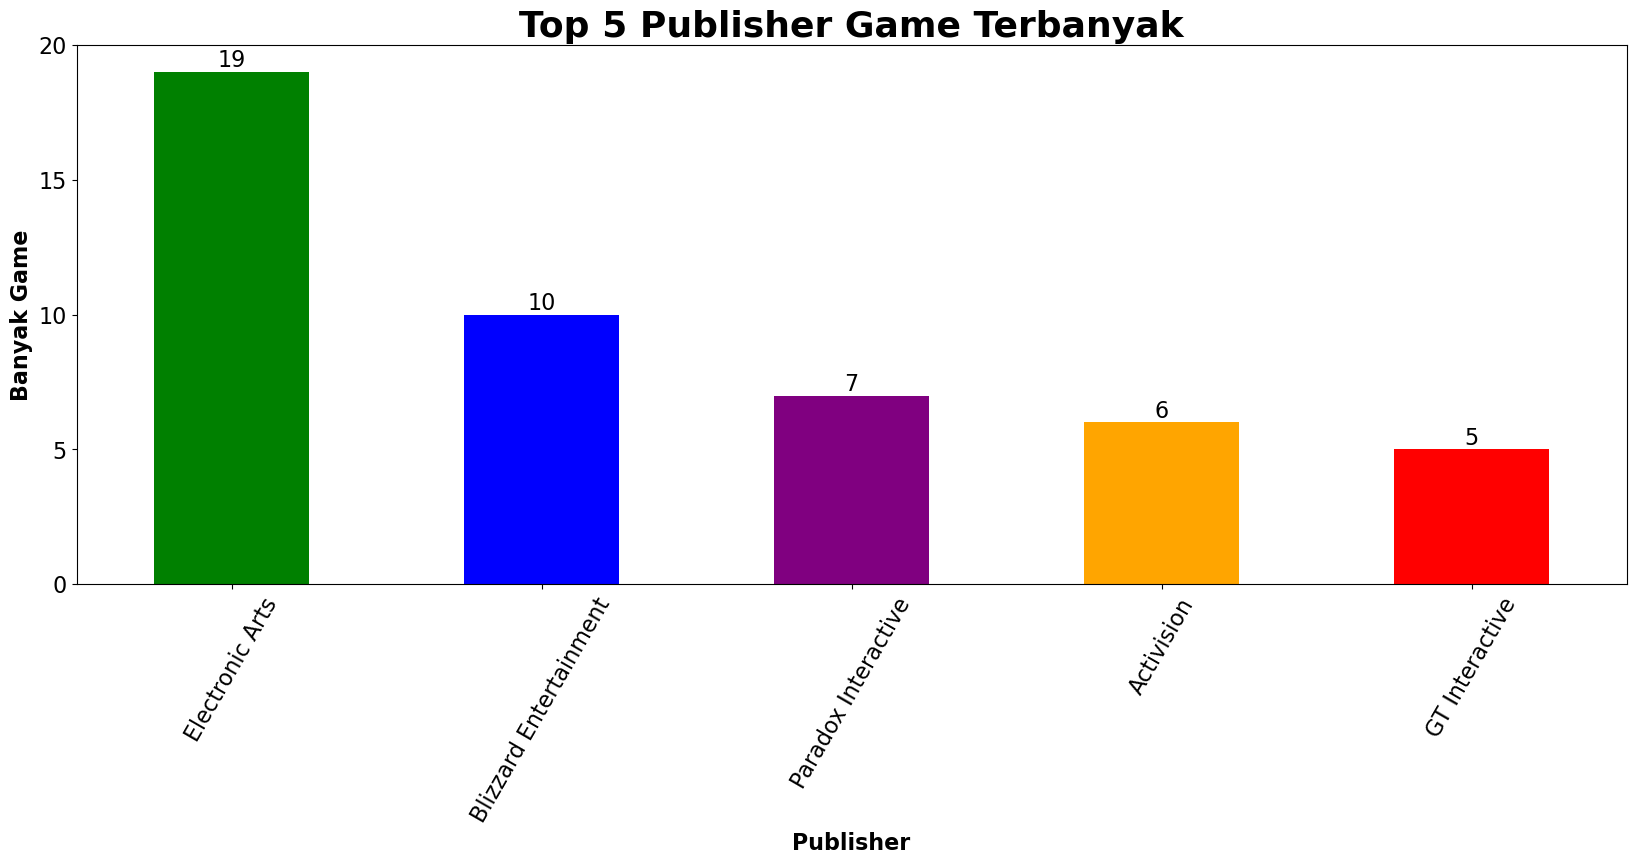

In [157]:
plt.figure(figsize=(20, 7))
Publisher.plot(kind='bar', color = ['Green', 'Blue', 'Purple', 'Orange', 'Red'])

plt.title('Top 5 Publisher Game Terbanyak', fontsize=26, fontweight='bold')
plt.xlabel('Publisher', fontsize=16, fontweight = 'bold')
plt.xticks(rotation = 60, fontsize=16)
plt.ylabel('Banyak Game', fontsize=16, fontweight = 'bold')
plt.yticks(fontsize=16, ticks=range(0, max(Jumlah_Game)+3, 5))
for i, v in enumerate(Publisher):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize = 16)
    
plt.show()

## Developer developed most the game

In [117]:
Developer = df['Developer'].value_counts().iloc[0:5]
Developer

Developer
Blizzard Entertainment        10
Maxis                          6
Paradox Development Studio     5
id Software                    4
Westwood Studios               4
Name: count, dtype: int64

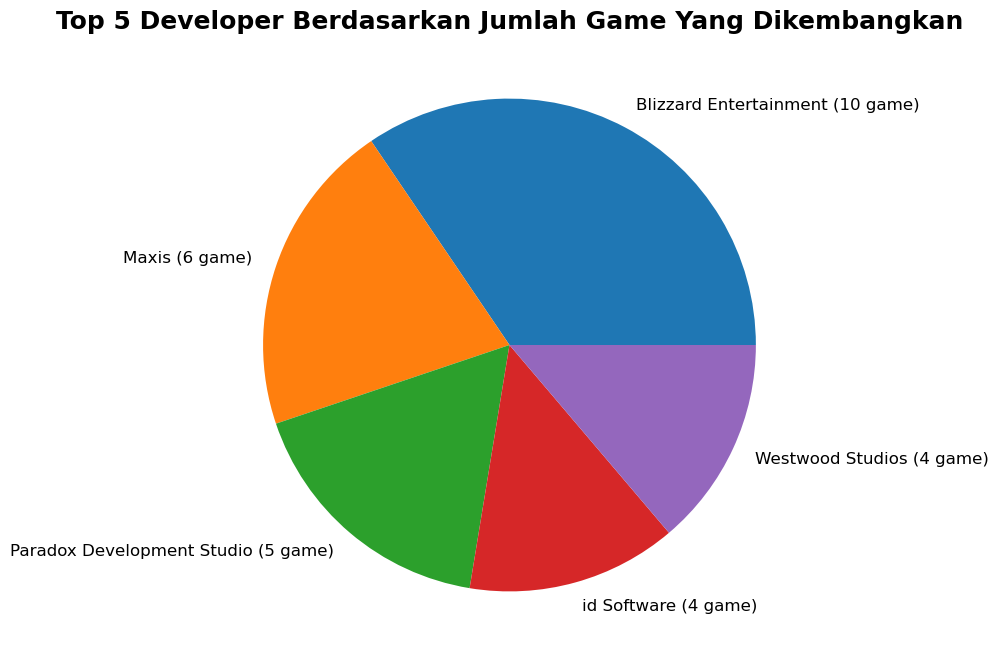

In [119]:
fig = plt.figure(figsize=(13,8))
plt.pie(Developer,  labels = [f"{name} ({count} game)" for name, count in Developer.items()], textprops={'fontsize': 12})
plt.title("Top 5 Developer Berdasarkan Jumlah Game Yang Dikembangkan",fontsize=18, fontweight='bold')
plt.show()

## Series most sales

In [145]:
Most_sales = df.sort_values('Sales', ascending = False)[0:5]
Most_sales

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,PlayerUnknown's,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Garry's,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Terraria,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [147]:
SeriesGame = Most_sales['Series']
SeriesGame

0    PlayerUnknown's
1          Minecraft
2             Diablo
3            Garry's
4           Terraria
Name: Series, dtype: object

In [149]:
SalesGame = Most_sales['Sales']
SalesGame

0    42.0
1    33.0
2    20.0
3    20.0
4    17.2
Name: Sales, dtype: float64

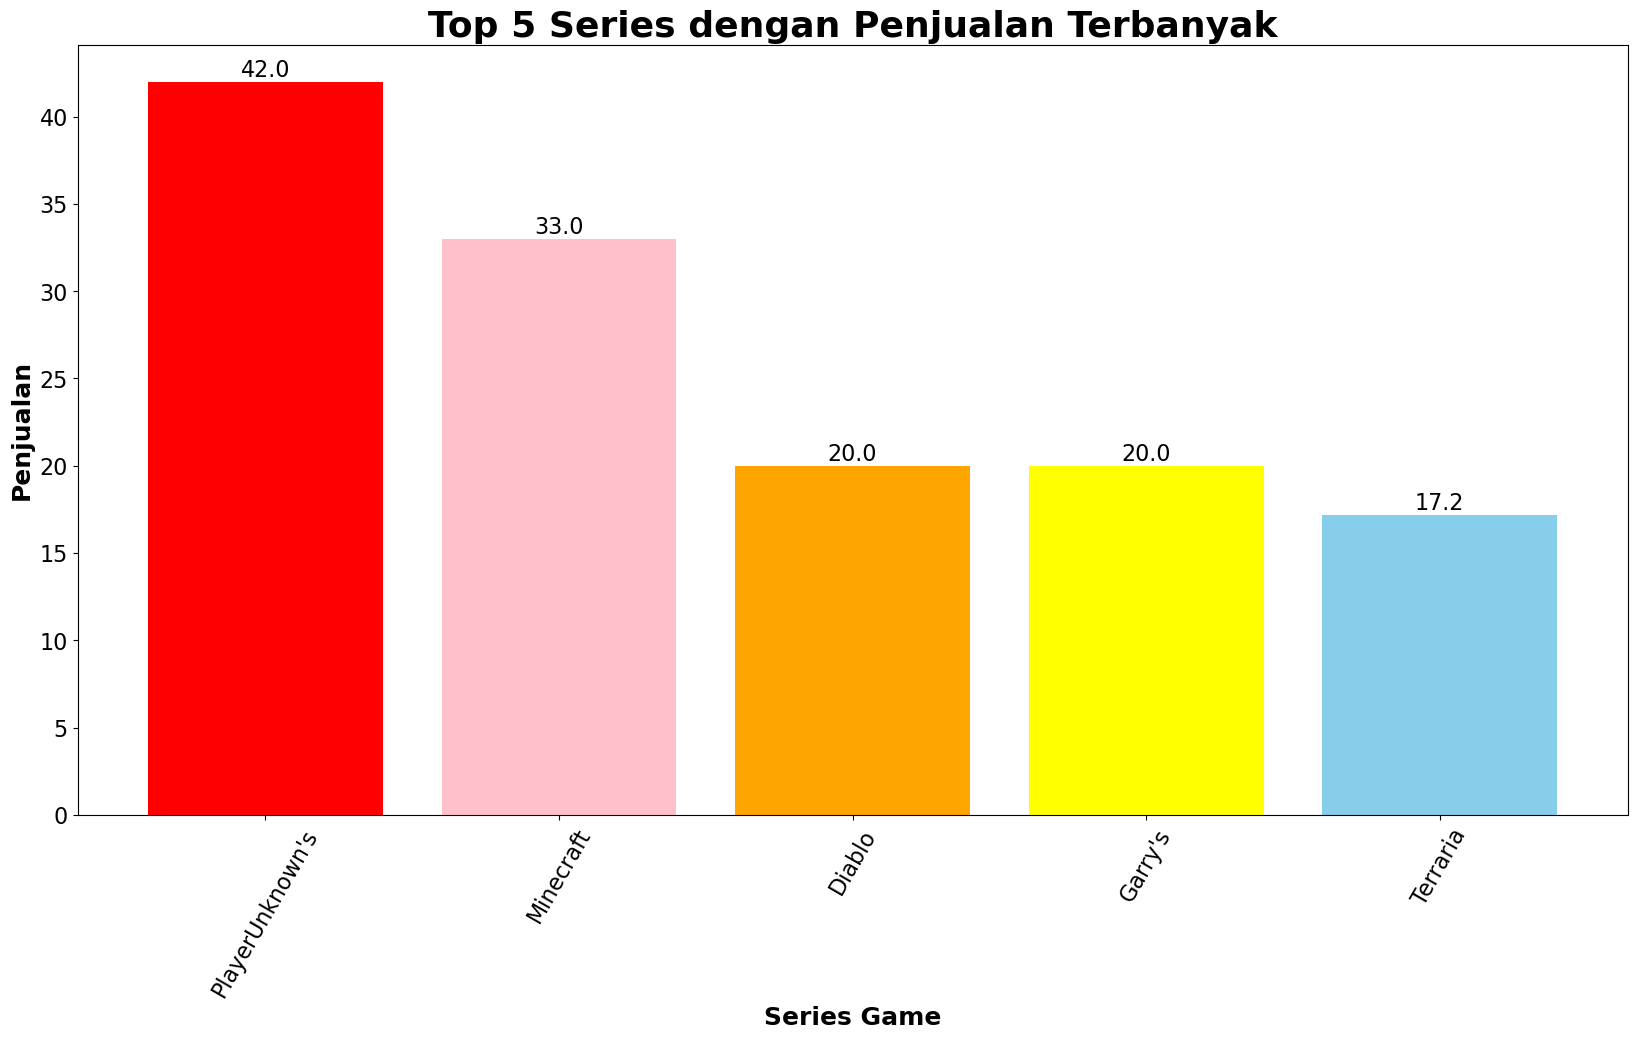

In [201]:
plt.figure(figsize=(20,10))
plt.bar(SeriesGame, SalesGame, color = ['Red', 'Pink', 'Orange', 'Yellow', 'SkyBlue'])
plt.xlabel('Series Game', fontsize=18, fontweight='bold')
plt.xticks(rotation=60, fontsize=16)
plt.ylabel('Penjualan', fontsize=18, fontweight='bold')
plt.yticks(fontsize=16)
plt.title('Top 5 Series dengan Penjualan Terbanyak', fontsize=26, fontweight='bold')
for index, value in enumerate(SalesGame):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=16, color='black')

plt.show()

## Series have most game

In [222]:
SeriesGameTerbanyak = df['Series'].value_counts()[:5]
SeriesGameTerbanyak

Series
StarCraft            6
Command & Conquer    5
Age of Empires       4
Civilization         4
Dark Souls           3
Name: count, dtype: int64

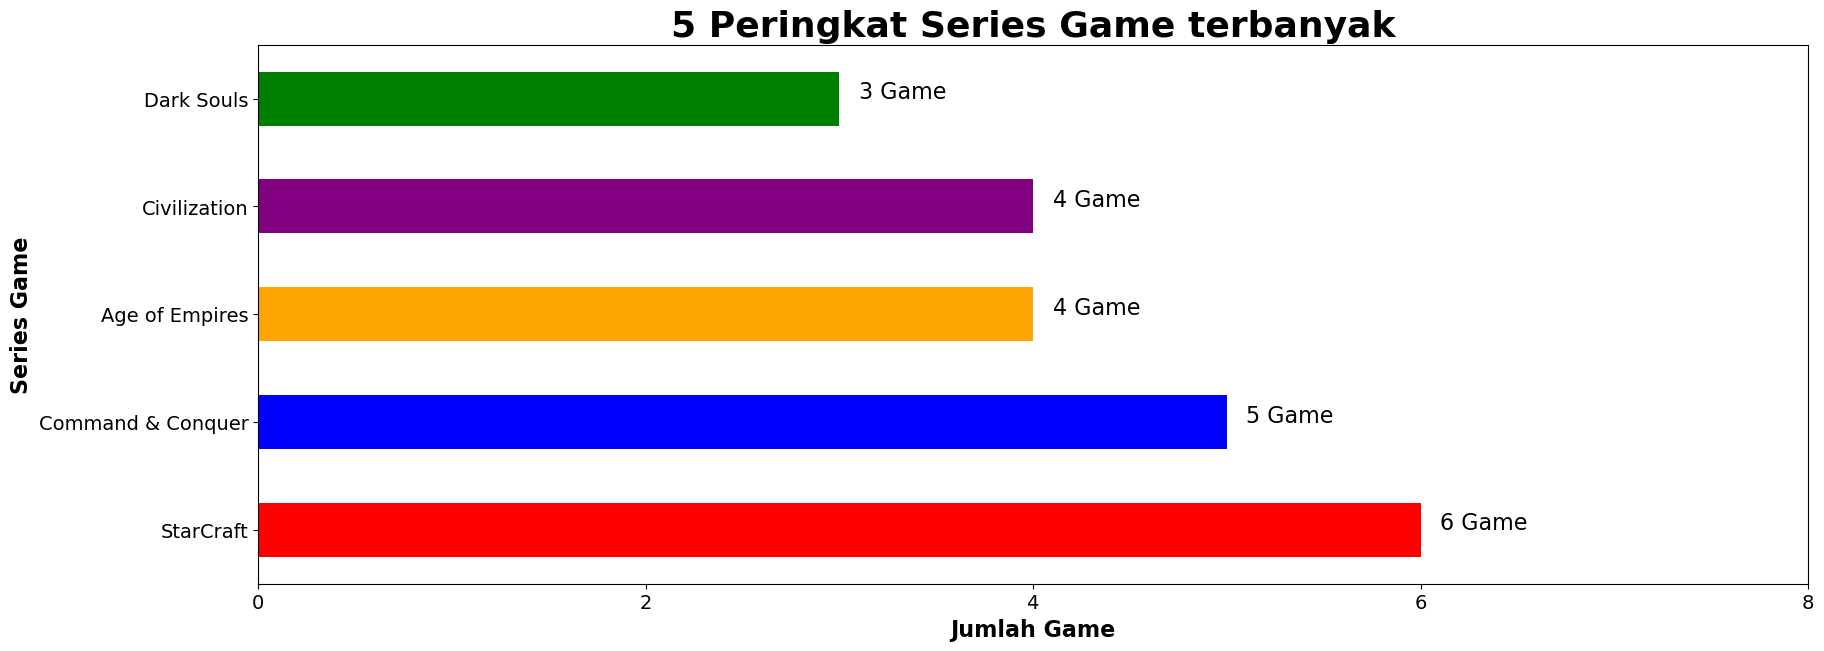

In [272]:
plt.figure(figsize=(20,7))
SeriesGameTerbanyak.plot(kind='barh', color=['red', 'blue', 'orange', 'purple', 'green'])

plt.title('5 Peringkat Series Game Terbanyak', fontsize=26, fontweight='bold')
plt.ylabel('Series Game', fontsize=16, fontweight='bold')
plt.yticks(fontsize=14)
plt.xlabel('Jumlah Game', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, ticks=range(0, max(SeriesGameTerbanyak)+ 4, 2))

for i, v in enumerate(SeriesGameTerbanyak):
    plt.text(v + 0.1, i, str(v) + ' Game', fontsize=16)

plt.show()

# Export Data

In [203]:
df.to_csv('Game_sales_clean.csv', index=False, encoding = 'utf-8-sig')